In [85]:
import pandas as pd
df= pd.read_csv("boston-data.csv")
print("TOP 5 ROWS")
print(df.head(5))
print("\nLAST 5 ROWS")
print(df.tail(5))

TOP 5 ROWS
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

LAST 5 ROWS
        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11

In [86]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [88]:
result=df.isnull().any().any() #Check for any null values in any column
#Print results
if result:
    print("NULL values present")
else:
    print("No NULL values")

No NULL values


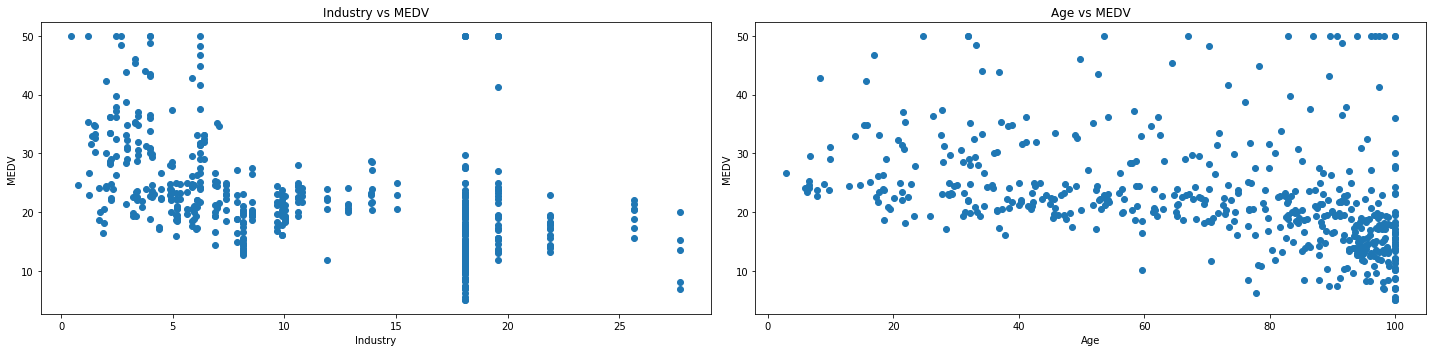

In [89]:
import matplotlib.pyplot as plt
indus=df['indus']
age=df['age']
medv=df['medv']
plt.figure(figsize=(20, 5))
#Plot Chart 1
plt.subplot(1, 2, 1)
plt.scatter(indus, medv)
plt.xlabel('Industry')
plt.ylabel('MEDV')
plt.title('Industry vs MEDV') 
#Plot Chart 2
plt.subplot(1, 2, 2)
plt.scatter(age, medv)
plt.xlabel('Age')
plt.ylabel('MEDV')
plt.title('Age vs MEDV')
plt.tight_layout()
plt.show()


In [90]:
tds = pd.DataFrame() #tds= Create training dataset
tds['indus'] = indus
tds['age'] = age
tds['medv']= medv
print(tds.head(5)) #Print top 5 rows

   indus   age  medv
0   2.31  65.2  24.0
1   7.07  78.9  21.6
2   7.07  61.1  34.7
3   2.18  45.8  33.4
4   2.18  54.2  36.2


In [91]:
tds.shape #Print shape of dataset

(506, 3)

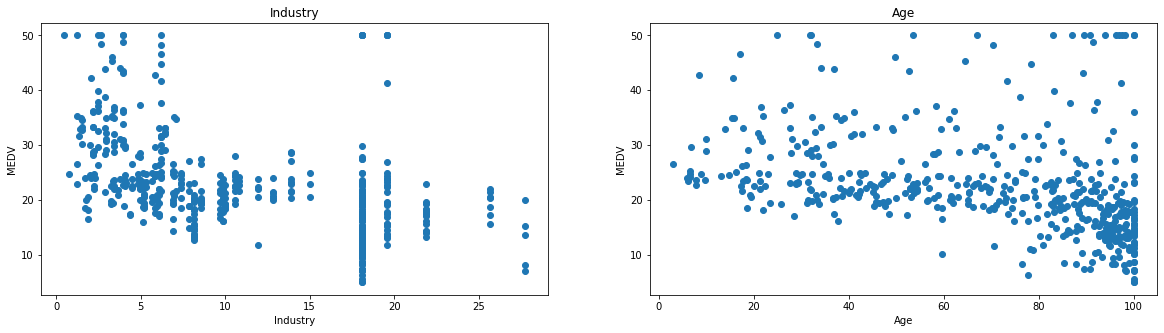

In [92]:
#Plot using the method as shown in pre-recitation exercise
# create a feature dataframe
feature_df = pd.DataFrame({'Industry': indus, 'Age': age})

y = medv

# craete a figure
plt.figure(figsize=(20, 5))

# iterate through each feature
for i, col in enumerate(feature_df.keys()):
    
    
    # create a subplot
    plt.subplot(1, len(feature_df.keys()) , i+1)
    
    # get the feature for the first subplot
    x = feature_df[col]

    # plot the scatter plot
    plt.scatter(x, y, marker='o')
    
    # add title
    plt.title(col)
    
    # add label for x-axis
    plt.xlabel(col)
    
    # add label for y-axis
    plt.ylabel('MEDV')